# DCGraM Algorithm

This notebook implements the D-Markov with Clustering and Graph Minimization (DCGraM) Algorithm. Its objective is to model a discrete dynamical system using a Probabilistic Finite State Machine (PFSA). 

Given a sequence *X* over the alphabet $\Sigma$ of length *N* that is an output of the original dynamical system, DCGraM works by:

1. Creating a D-Markov model for the original system for a given *D*;
2. Using a clustering algorithm on the D-Markov model states in order to create an initial partition;
3. Using a graph minimization algorithm to refine the initial partition until the final reduced PFSA is obtained.

## Initialization
First, it is necessary to create the directories that store the working files for the current system. The first cell sets the system's name and the tag to be used in the current run. The following cell only has to be ran when creating modeling a new system.  A directory is then created with this tag and inside it subdirectories that contain the sequence, PFSA and result files.

In [1]:
import pandas as pd
import yaml
import sequenceanalyzer as sa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'ternary_even_shift'
tag = 'v1'

In [3]:
import os
if not os.path.exists(name):
    os.makedirs(name)
    os.makedirs(name + '/sequences')
    os.makedirs(name + '/pfsa')
    os.makedirs(name + '/results')
    os.makedirs(name + '/results/probabilities')
    os.makedirs(name + '/results/probabilities/conditional')
    os.makedirs(name + '/results/cond_entropies')
    os.makedirs(name + '/results/kldivergences')
    os.makedirs(name + '/results/autocorrelations')
    os.makedirs(name + '/results/prob_distances')
    os.makedirs(name + '/results/plots')

### Parameters

The next cell initializes the parameters that are used throughout the code. They are listed as:

  * `N`: The original sequence length *N*, which is also the length of the sequences that are going to be generated by the PFSA generated by DCGraM;
  * `drange`: range of values of *D* for which D-Markov and DCGraM machines that will be generated;
  * `a`: value up to which the autocorrelation is computed.

In [1]:
N = 10000000
drange = range(4,11)
a = 20

## Original Sequence Analysis

Make sure that the original sequence of length `N` is stored in the correct directory and run the cell to load it to `X`. After this, run the cells corresponding to the computation of the subsequence probabilities and the conditional probabilites for the value `d_max`, which is the last value in `drange`. Additional results can also be computed in the respective cells (autocorrelation and conditional entropy).

In [5]:
#Open original sequence from yaml file
with open(name + '/sequences/original_len_' + str(N) + '_' + tag + '.yaml', 'r') as f:
    X = yaml.load(f)
    
#Value up to which results are computed
d_max = drange[-1]
    
#Initialization of variables:
p = None
p_cond = None

In [6]:
#Compute subsequence probabilities of occurrence up to length d_max
p, alphabet = sa.calc_probs(X, d_max)
with open(name + '/results/probabilities/original_' + tag + '.yaml', 'w') as f:
    yaml.dump(p, f)
with open(name + '/alphabet.yaml', 'w') as f:
    yaml.dump(alphabet, f)

Calculating subsequence probabilities
L = 10
Calculating probabilities of subsequences of length: 1
Calculating probabilities of subsequences of length: 2
Calculating probabilities of subsequences of length: 3
Calculating probabilities of subsequences of length: 4
Calculating probabilities of subsequences of length: 5
Calculating probabilities of subsequences of length: 6
Calculating probabilities of subsequences of length: 7
Calculating probabilities of subsequences of length: 8
Calculating probabilities of subsequences of length: 9
Calculating probabilities of subsequences of length: 10
*****************
Probabilities calculated!
*****************


In [6]:
#If p has been previously computed, use this cell to load the values
if not p:
    with open(name + '/results/probabilities/original_' + tag + '.yaml', 'r') as f:
        p = yaml.load(f)
    with open(name + '/alphabet.yaml', 'r') as f:
        alphabet = yaml.load(f)
    print("Probabilities loaded sucessfully.")

Probabilities loaded sucessfully.


In [7]:
#Compute conditional probabilities of subsequences occurring after given each symbol of the alphabet
#One of the two previous cells needs to be executed first.
if p:
    p_cond = sa.calc_cond_probs(p, alphabet, d_max - 1) 
    with open(name + '/results/probabilities/conditional/original_' + tag + '.yaml', 'w') as f:
        yaml.dump(p_cond, f)
else:
    print("Run a cell that either computes or opens the probabilities.")

Calculating subsequence conditional probabilities
L = 9
Calculating conditional probabilities of subsequences of length: 1
Calculating conditional probabilities of subsequences of length: 2
Calculating conditional probabilities of subsequences of length: 3
Calculating conditional probabilities of subsequences of length: 4
Calculating conditional probabilities of subsequences of length: 5
Calculating conditional probabilities of subsequences of length: 6
Calculating conditional probabilities of subsequences of length: 7
Calculating conditional probabilities of subsequences of length: 8
Calculating conditional probabilities of subsequences of length: 9
*****************
Conditional probabilities calculated!
*****************


In [9]:
for i in range(len(p)):
    print('i{}'.format(i))
    for keys,values in p[i].items():
        print(keys)
        print(values)

i0
0
0.3332429
2
0.3335339
1
0.3332232
i1
02
0.0833168
22
0.2085129
21
0.0416948
11
0.208256
10
0.083263
00
0.1666537
01
0.0832724
12
0.0417042
20
0.0833261
i2
022
0.0833168
221
0.0416948
211
0.0416948
111
0.0832888
110
0.083263
100
0.0416851
000
0.0833312
002
0.0416765
001
0.041646
011
0.0832724
112
0.0417042
122
0.0417041
220
0.0833261
201
0.0208243
200
0.0416374
202
0.0208644
222
0.083492
102
0.0207758
101
0.0208021
i3
0221
0.0208434
2211
0.0416948
2111
0.0104398
1111
0.0520475
1110
0.0208392
1100
0.0416851
1000
0.0208974
0000
0.0416368
0002
0.0208539
0022
0.0416765
2110
0.0208341
1001
0.0103544
0011
0.041646
0112
0.0208812
1122
0.0417041
1221
0.0104387
2112
0.0104209
1220
0.0208621
2201
0.0208243
2011
0.0208243
2200
0.0416374
2000
0.020797
0001
0.0208405
2202
0.0208644
2022
0.0208644
0220
0.0416505
2001
0.0104511
0111
0.0208015
0110
0.0415897
1112
0.0104021
1222
0.0104033
2222
0.0522658
2220
0.0208135
2002
0.0103893
1002
0.0104333
1102
0.0207758
1022
0.0207758
0222
0.0208229
1101
0

0.0012898
000001100
0.0012768
000011001
0.0006341
000110011
0.0012729
110011111
0.0006414
100111111
0.0006414
011111102
0.0006461
111110221
0.0003277
111102211
0.0013111
111022110
0.0006555
110221100
0.0012994
102211002
0.0003218
211002202
0.0003288
110022022
0.0013001
100220222
0.0003163
002202222
0.0012967
022022222
0.0006488
220222222
0.0012951
202222222
0.0003288
022222222
0.0013135
222222220
0.0013325
222222200
0.0006662
222222000
0.0012961
222220001
0.0003303
222200011
0.0012992
222000111
0.0003165
200011110
0.0006376
000111102
0.0006539
001111022
0.0013199
011110221
0.0006576
110221101
0.0006461
102211011
0.0006461
221101102
0.0006529
211011022
0.0006529
110110220
0.0013074
101102202
0.000328
011022022
0.0012909
110220220
0.0012957
102202202
0.0003209
022022022
0.0013115
220220220
0.0013285
202202200
0.0006738
022022000
0.0013218
220220001
0.0006507
202200011
0.0006507
022000112
0.0006617
220001122
0.001311
200011220
0.0006568
000112200
0.0013189
001122000
0.0012932
112200002
0.

2011011011
0.0003251
1011000002
0.0001716
0002211002
0.0003305
2110022222
0.0001717
1002222222
0.0001615
0022222222
0.0006468
0222222222
0.0003283
2222222222
0.0008221
2222222220
0.0003281
2222222201
0.0003397
2222222011
0.0003397
2222201101
0.0001683
1101102201
0.0003339
1011022011
0.0003339
0110220110
0.0006579
1022011000
0.0003242
0220110000
0.0006459
2201100001
0.0003203
2011000011
0.0003203
1000011000
0.0003284
0011000221
0.0003299
1100022112
0.0003301
1000221122
0.0003301
1221122002
0.0001594
2211220022
0.0006393
2112200220
0.0003146
1122002202
0.0003232
1220022022
0.0003232
2200220220
0.0006494
2002202201
0.0001581
0220220111
0.0003316
2022011110
0.0003258
0220111101
0.0003234
2011110112
0.0001688
1221101100
0.0003316
2211011001
0.0003271
2110110011
0.0003271
1101100110
0.0006444
1011001101
0.000157
1100110110
0.0006375
1001101101
0.0001638
1111011001
0.0003244
1110110011
0.0003244
1011001102
0.0001692
1100110222
0.0003127
1001102222
0.0003127
0011022221
0.000326
0110222211
0.00

In [10]:
for i in range(len(p_cond)):
    print('i{}'.format(i))
    for keys,values in p_cond[i].items():
        print(keys)
        print(values)

i0
0
0.3332429
1
0.3332232
2
0.3335339
i1
0|0
0.5000967762553981
0|1
0.2498715575626187
0|2
0.24982797850533334
1|0
0.2498849937988176
1|1
0.6249744915720153
1|2
0.12500918197520552
2|0
0.25001822994578426
2|1
0.1251539508653659
2|2
0.6251625396998626
i2
0|00
0.5000261020307379
0|01
0.0
0|02
0.0
0|10
0.5006437433193616
0|11
0.3998108097725876
0|12
0.0
0|20
0.49969217328064075
0|21
0.0
0|22
0.3996208388066158
1|00
0.24989544186537715
1|01
1.0
1|02
0.0
1|10
0.2498360616360208
1|11
0.39993469575906576
1|12
0.0
1|20
0.24991329247378674
1|21
1.0
1|22
0.19996268815982127
2|00
0.2500784561038849
2|01
0.0
2|02
1.0
2|10
0.24952019504461764
2|11
0.20025449446834664
2|12
0.9999976021599744
2|20
0.2503945342455725
2|21
0.0
2|22
0.40041647303356287
i3
0|000
0.49965439115241356
0|001
0.0
0|002
0.0
0|011
0.4994415916918451
0|022
0.4999051811879477
0|100
0.501315817882169
0|101
0.0
0|102
0.0
0|110
0.5006437433193616
0|111
0.25020410907589014
0|112
0.0
0|122
0.5002409835004232
0|200
0.4994788339329545


2|2222112
1.0
2|2222200
0.2536290168141254
2|2222201
0.0
2|2222202
1.0
2|2222211
0.2512365877787079
2|2222220
0.25115268833593724
2|2222221
0.0
2|2222222
0.6243094967839576
i8
0|00000000
0.4974214901477833
0|00000001
0.0
0|00000002
0.0
0|00000011
0.4999806179013064
0|00000022
0.502634108825226
0|00000110
0.49383098046799456
0|00000111
0.0
0|00000112
0.0
0|00000220
0.496475635917867
0|00000221
0.0
0|00000222
0.0
0|00001100
0.50582705306503
0|00001101
0.0
0|00001102
0.0
0|00001111
0.4993660916669868
0|00001122
0.4998279882267497
0|00002200
0.49839663099331605
0|00002201
0.0
0|00002202
0.0
0|00002211
0.5045676004872106
0|00002222
0.4962040926432619
0|00011000
0.49635344695224937
0|00011001
0.0
0|00011002
0.0
0|00011011
0.49441426275920114
0|00011022
0.4978689091118535
0|00011110
0.4979769565720011
0|00011111
0.0
0|00011112
0.0
0|00011220
0.5011399042480431
0|00011221
0.0
0|00011222
0.0
0|00022000
0.5045811769216024
0|00022001
0.0
0|00022002
0.0
0|00022011
0.497104506232023
0|00022022
0.50

0|100011011
0.49578156158920084
0|100011022
0.49718802249582
0|100011110
0.5011403375399118
0|100011111
0.0
0|100011112
0.0
0|100011220
0.49505543901708127
0|100011221
0.0
0|100011222
0.0
0|100022000
0.5044744425906265
0|100022001
0.0
0|100022002
0.0
0|100022011
0.5047250193648335
0|100022022
0.49286465374793453
0|100022110
0.5060003038128513
0|100022111
0.0
0|100022112
0.0
0|100022220
0.5007706535141799
0|100022221
0.0
0|100022222
0.0
0|100110000
0.49387947269303206
0|100110001
0.0
0|100110002
0.0
0|100110011
0.49148533585619675
0|100110022
0.49634468813190236
0|100110110
0.4856470588235294
0|100110111
0.0
0|100110112
0.0
0|100110220
0.5009290802105916
0|100110221
0.0
0|100110222
0.0
0|100111100
0.5025835866261399
0|100111101
0.0
0|100111102
0.0
0|100111111
0.503429996881821
0|100111122
0.4955094456488077
0|100112200
0.4912034874669158
0|100112201
0.0
0|100112202
0.0
0|100112211
0.5096793708408953
0|100112222
0.49586903304773566
0|100220000
0.5044496487119438
0|100220001
0.0
0|1002200

1|211000111
1.0
1|211000112
0.0
1|211000220
0.2456059204440333
1|211000221
1.0
1|211000222
0.0
1|211001100
0.2484619025082821
1|211001101
1.0
1|211001102
0.0
1|211001111
0.2458890425695405
1|211001122
0.25996955859969556
1|211002200
0.25827219643659227
1|211002201
1.0
1|211002202
0.0
1|211002211
0.25099297280782157
1|211002222
0.2510782501540358
1|211011000
0.25544401544401546
1|211011001
1.0
1|211011002
0.0
1|211011011
0.26370757180156656
1|211011022
0.2504211977331904
1|211011110
0.24514637904468414
1|211011111
1.0
1|211011112
0.0
1|211011220
0.25755046289269995
1|211011221
1.0
1|211011222
0.0
1|211022000
0.26009593068234566
1|211022001
1.0
1|211022002
0.0
1|211022011
0.24449915371595632
1|211022022
0.25146198830409355
1|211022110
0.24602927436935532
1|211022111
1.0
1|211022112
0.0
1|211022220
0.25270479134466767
1|211022221
1.0
1|211022222
0.0
1|211110000
0.2527943653345583
1|211110001
1.0
1|211110002
0.0
1|211110011
0.2426784624771202
1|211110022
0.24868867633446465
1|211110110
0.2

In [7]:
#If p_cond has been previously computed, use this cell to load the values
if not p_cond:
    with open(name + '/results/probabilities/conditional/original_' + tag + '.yaml', 'r') as f:
        p_cond = yaml.load(f)
    print("Conditional probabilities loaded sucessfully.")

Conditional probabilities loaded sucessfully.


In [8]:
#Compute conditional entropy
if p and p_cond:
    h = sa.calc_cond_entropy(p, p_cond, d_max)
    h_df = pd.DataFrame(h, columns=["cond_entropy"])
    h_df.to_csv(name + '/results/cond_entropies/original_' + tag + '.csv', index=False)
else:
    print("Run the conditional probabilities cell first.")

Calculating conditional entropy for sequence at: 
L = 10
Sequence: 
Calculating conditional entropy of length: 1
x=0
x=1
x=2
Sequence: 
Calculating conditional entropy of length: 2
x=00
x=01
x=02
x=10
x=11
x=12
x=20
x=21
x=22
Sequence: 
Calculating conditional entropy of length: 3
x=000
x=001
x=002
x=011
x=022
x=100
x=101
x=102
x=110
x=111
x=112
x=122
x=200
x=201
x=202
x=211
x=220
x=221
x=222
Sequence: 
Calculating conditional entropy of length: 4
x=0000
x=0001
x=0002
x=0011
x=0022
x=0110
x=0111
x=0112
x=0220
x=0221
x=0222
x=1000
x=1001
x=1002
x=1011
x=1022
x=1100
x=1101
x=1102
x=1110
x=1111
x=1112
x=1122
x=1220
x=1221
x=1222
x=2000
x=2001
x=2002
x=2011
x=2022
x=2110
x=2111
x=2112
x=2200
x=2201
x=2202
x=2211
x=2220
x=2221
x=2222
Sequence: 
Calculating conditional entropy of length: 5
x=00000
x=00001
x=00002
x=00011
x=00022
x=00110
x=00111
x=00112
x=00220
x=00221
x=00222
x=01100
x=01101
x=01102
x=01111
x=01122
x=02200
x=02201
x=02202
x=02211
x=02222
x=10000
x=10001
x=10002
x=10011
x=100

x=0222202202
x=0222202211
x=0222202222
x=0222211000
x=0222211001
x=0222211002
x=0222211011
x=0222211022
x=0222211110
x=0222211111
x=0222211112
x=0222211220
x=0222211221
x=0222211222
x=0222222000
x=0222222001
x=0222222002
x=0222222011
x=0222222022
x=0222222110
x=0222222111
x=0222222112
x=0222222220
x=0222222221
x=0222222222
x=1000000000
x=1000000001
x=1000000002
x=1000000011
x=1000000022
x=1000000110
x=1000000111
x=1000000112
x=1000000220
x=1000000221
x=1000000222
x=1000001100
x=1000001101
x=1000001102
x=1000001111
x=1000001122
x=1000002200
x=1000002201
x=1000002202
x=1000002211
x=1000002222
x=1000011000
x=1000011001
x=1000011002
x=1000011011
x=1000011022
x=1000011110
x=1000011111
x=1000011112
x=1000011220
x=1000011221
x=1000011222
x=1000022000
x=1000022001
x=1000022002
x=1000022011
x=1000022022
x=1000022110
x=1000022111
x=1000022112
x=1000022220
x=1000022221
x=1000022222
x=1000110000
x=1000110001
x=1000110002
x=1000110011
x=1000110022
x=1000110110
x=1000110111
x=1000110112
x=1000110220

In [9]:
print(h)

[1.5849623697348267, 1.3658066082546108, 1.1341692077119307, 1.0913522359804873, 1.0335774516477922, 1.022952581411869, 1.0084091496933183, 1.0057339534037015, 1.002051458003997, 1.0013299968628724]


In [ ]:
#If cond_entropy has been previously computed, use this cell to load the values
if not h:
    h = pd.read_csv(name + '/results/cond_entropies/original_' + tag + '.csv')

In [ ]:
#Compute autocorrelation
aut = sa.calc_autocorr(X, a)
aut.to_csv(name + '/results/autocorrelations/original_' + tag + '.csv')

In [ ]:
#If aut has been previously computed, use this cell to load the values
if not aut:
    aut = pd.read_csv(name + '/results/autocorrelations/original_' + tag + '.csv')

## D-Markov Machines

The next step of DCGraM consists of generating D-Markov Machines for each value of *D* in `drange` defined above. The values of `p_cond` for each of these values is then needed, so it is necessary to compute it above. A D-Markov Machine is a PFSA with $|\Sigma|^D$ states, each one labeled with one of the subsquences of length $D$. Given a state $\omega = \sigma_1\sigma_2\ldots\sigma_D$, for each $\sigma \in \Sigma$, it transitions to the state $\sigma_2\sigma_3\ldots\sigma_D\sigma$ with probability $\Pr(\sigma|\omega)$. This is done for all states in the D-Markov machine.

In [12]:
import dmarkov as dmkv

dmark_machines = []

In [ ]:
#If the D-Markov machines have not been previously created, generate them with this cell
for D in list(map(str,drange)):
    dmark_machines.append(dmarkov.create(p_cond, D))
    machines_df = pd.DataFrame(dmark_machines, columns=["dmark_machine"])
    machines_df[-1].to_csv(name + '/pfsa/dmarkov_D' + D + '_' + tag + '.csv', index=False)

In [13]:
for curr_d in drange[0:-1]:
    #from 4 to 9
    dmark_machines.append(dmkv.DMarkov(p_cond, curr_d, alphabet))

In [21]:
from pprint import pprint

print(len(dmark_machines[2].states))
for i in range(len(dmark_machines[2].states)):
    pprint(vars(dmark_machines[2].states[i]))

169
{'name': '000000',
 'outedges': [('0', '000000', 0.5014292451468225),
              ('2', '000002', 0.2502863302566867),
              ('1', '000001', 0.2482844245964909)]}
{'name': '000002', 'outedges': [('2', '000022', 1.0)]}
{'name': '000001', 'outedges': [('1', '000011', 1.0)]}
{'name': '000022',
 'outedges': [('0', '000220', 0.4996071291682636),
              ('2', '000222', 0.24864890762744343),
              ('1', '000221', 0.2517439632042928)]}
{'name': '000011',
 'outedges': [('0', '000110', 0.4977770934775496),
              ('2', '000112', 0.2517465694104968),
              ('1', '000111', 0.25047633711195366)]}
{'name': '000220',
 'outedges': [('0', '002200', 0.49815466319008406),
              ('2', '002202', 0.25188607801221274),
              ('1', '002201', 0.24995925879770314)]}
{'name': '000222', 'outedges': [('2', '002222', 1.0)]}
{'name': '000221', 'outedges': [('1', '002211', 1.0)]}
{'name': '000110',
 'outedges': [('0', '001100', 0.4976461640657341),
         

In [ ]:
#On the other hand, if there already are D-Markov machines, load them with this cell
if not dmark_machines:
    for D in drange:
        dmark_machines.append(pd.read_csv(name + '/pfsa/dmarkov_D' + D + '_' + tag + '.csv'))

In [15]:
sequences = []
curr_sequence = ''

for curr_d in drange[0:-2]:
    normalized_prob = np.array([prob for prob in p[curr_d-1].values()])
    normalized_prob = normalized_prob/normalized_prob.sum()
    curr_state_name = np.random.choice([x for x in p[curr_d-1].keys()], 1, p = normalized_prob)
    curr_state_name = curr_state_name[0]
    print("state_name: " + curr_state_name)
    machine = dmark_machines[curr_d - drange[0]]
    curr_state = [x for x in machine.states if x.name == curr_state_name]


    print("curr_state")
    for i in curr_state:
        print(i.name)

    for i in range(10000):
        label = np.random.choice([label[0] for label in curr_state[0].outedges], 1, [prob[-1] for prob in curr_state[0].outedges])
        label = label[0]
        curr_sequence = curr_sequence + label
        curr_state_name = curr_state_name[1:] + label
        curr_state = [x for x in machine.states if x.name == curr_state_name]

    sequences.append(curr_sequence)
print(sequences)

state_name: 1022
curr_state
1022
state_name: 20011
curr_state
20011
state_name: 222000
curr_state
222000
state_name: 1111220
curr_state
1111220
state_name: 00022220
curr_state
00022220
['002211220220112222110222222011112201111111022112222111111222200112211110222221111222202201102211011011112222011222221122002211111222211001100111101102202202202211112222111110220011221111011222201122222002211220002200111122221102222201101100222220221122022222111122220221111022222022001100110111111220112222011222211222211222201102211001122022221102201100222221101111220111110011011111220001111002211022022110220011022110221101111011111022110022000112200221111022220000011011220110222211221100110112222011112202200221100022111100221102201111112222011000220011221111011022110001100112202202211222220222211222200111111022110110110022011222211222222011220022112211112200111122112202211111011221102222112222011002202201111221111221122111122222002222200002202222112201111111222220011112222022220011011110011221122011111

### D-Markov Machine Analysis

First of all, sequences should be generated from the D-Markov Machines. The same parameters computed in the analysis of the original sequence should be computed for the D-Markov Machines' sequences. Besides those parameters, the Kullback-Leibler Divergence and Distribution Distance between these sequences and the original sequence.

Calculating subsequence probabilities
L = 10
Calculating probabilities of subsequences of length: 1
Calculating probabilities of subsequences of length: 2
Calculating probabilities of subsequences of length: 3
Calculating probabilities of subsequences of length: 4
Calculating probabilities of subsequences of length: 5
Calculating probabilities of subsequences of length: 6
Calculating probabilities of subsequences of length: 7
Calculating probabilities of subsequences of length: 8
Calculating probabilities of subsequences of length: 9
Calculating probabilities of subsequences of length: 10
*****************
Probabilities calculated!
*****************
Calculating subsequence conditional probabilities
L = 9
Calculating conditional probabilities of subsequences of length: 1
Calculating conditional probabilities of subsequences of length: 2
Calculating conditional probabilities of subsequences of length: 3
Calculating conditional probabilities of subsequences of length: 4
Calculating condit

x=00111122
x=21111110
x=22001122
x=22200002
x=00220111
x=22220002
x=21100220
x=20002201
x=01102222
x=11002211
x=22200220
x=10221111
x=22211011
x=00110111
x=12211111
x=21111001
x=20002202
x=11222201
x=22200222
x=22112201
x=21122011
x=21122111
x=00011220
x=22112222
x=10011022
x=10222221
x=00112200
x=10002201
x=11111112
x=20022221
x=11111002
x=02222112
x=01122221
x=12211022
x=20110222
x=10110022
x=10022111
x=22200011
x=02200221
x=11000111
x=22221102
x=02222011
x=02202211
x=21111011
x=22222202
x=11122022
x=10110110
x=10002211
x=20110022
x=20221101
x=20222202
x=22211000
x=00022002
x=11101100
x=22000022
x=11221111
x=21100110
x=21111102
x=11111222
x=00222220
x=00110222
x=22001101
x=10221100
x=20112222
x=12201102
x=21101102
x=02201122
x=11110221
x=22211220
x=22200221
x=01122112
x=12222222
x=22220011
x=22011112
x=22220022
x=20022222
x=00000002
x=21111112
x=22110222
x=20002211
x=01111002
x=10112222
x=01100011
x=00221102
x=12222001
x=00011001
x=12201101
x=12211110
x=22022220
x=22202211
x=02222201

x=1100022112
x=2110011112
x=1100110111
x=1011111122
x=2001111101
x=0222220222
x=0011112222
x=0002222221
x=0002200220
x=2011011112
x=1100000221
x=0221111220
x=2000221101
x=1001122022
x=2200221111
x=1100000001
x=1221122022
x=0022001122
x=2002201122
x=0220011220
x=1122000022
x=0022022222
x=0011011111
x=2022002211
x=2200111112
x=1122022222
x=1100011000
x=2011221111
x=1220011112
x=1102200221
x=0022222001
x=0002201100
x=2222201101
x=2202202222
x=2221111000
x=1101111112
x=2221122221
x=1110001122
x=2011022221
x=2220110111
x=1111111220
x=0001122111
x=2112222222
x=2200111110
x=2220011110
x=2201111122
x=1221102200
x=1100000222
x=0000000112
x=2011001100
x=1221100111
x=2000011112
x=1111111111
x=2220220011
x=1220110001
x=0001111122
x=2222002201
x=1220001122
x=1220222221
x=1220220222
x=2211000000
x=0111110001
x=0011002211
x=1022110000
x=0011220110
x=2222000001
x=0001102211
x=2211110220
x=2002201102
x=2022110000
x=1111000001
x=2221102202
x=0011002201
x=0011011011
x=1001111002
x=1101111110
x=1011222221

q = 0.0002
current kl: 1.9638626435005855
p = 0.0006524
q = 0.0003
current kl: 1.9645938496897244
p = 0.0003196
q = 0.0005
current kl: 1.9643874965342802
p = 0.0003312
q = 0.0002
current kl: 1.964628511659524
p = 0.0001615
q = 0.0003
current kl: 1.964484222983292
p = 0.0003334
q = 0.0002
current kl: 1.9647300235016736
p = 0.0001638
q = 0.0002
current kl: 1.9646828385131467
p = 0.0003451
q = 0.0007
current kl: 1.964330719024444
p = 0.0006488
q = 0.0003
current kl: 1.9650527110081033
p = 0.0006584
q = 1e-15
current kl: 1.9909016091611795
p = 0.0003224
q = 0.0001
current kl: 1.9914460949634019
p = 0.000657
q = 0.0008
current kl: 1.9912594369078516
p = 0.0006583
q = 1e-15
current kl: 2.0171042647850426
p = 0.000331
q = 0.0002
current kl: 2.01734484591788
p = 0.0001689
q = 1e-15
current kl: 2.023644373124894
p = 0.0006546
q = 0.0007
current kl: 2.0235810462570347
p = 0.00016
q = 1e-15
current kl: 2.0295361312088547
p = 0.0006475
q = 0.0001
current kl: 2.031281066133692
p = 0.0001581
q = 0.0

p = 0.0003248
q = 0.0003
current kl: 5.45112521211844
p = 0.0001599
q = 0.0004
current kl: 5.450913691591658
p = 0.0006468
q = 0.0001
current kl: 5.452655730759913
p = 0.0003237
q = 1e-15
current kl: 5.465032680716606
p = 0.0001664
q = 1e-15
current kl: 5.4712353845656185
p = 0.0001638
q = 1e-15
current kl: 5.47733744961846
p = 0.0003276
q = 0.0001
current kl: 5.477898279641407
p = 0.0003188
q = 0.0002
current kl: 5.478112720980836
p = 0.0006546
q = 0.0004
current kl: 5.478577888644956
p = 0.0003371
q = 1e-15
current kl: 5.491486926054678
p = 0.0001616
q = 0.0001
current kl: 5.491598822289889
p = 0.0003306
q = 1e-15
current kl: 5.504249659670919
p = 0.0003286
q = 0.0007
current kl: 5.503891149696554
p = 0.0006431
q = 0.0001
current kl: 5.505617900907397
p = 0.0001616
q = 0.0001
current kl: 5.505729797142608
p = 0.000331
q = 0.0007
current kl: 5.505372143796245
p = 0.0001675
q = 0.0003
current kl: 5.505231309560882
p = 0.000319
q = 0.0003
current kl: 5.505259571022405
p = 0.0001795
q = 

x=0111112222
x=1220221101
x=1022001102
x=2221100221
x=2112211022
x=0022022221
x=1001122011
x=2222011221
x=2200011112
x=0000112222
x=1222222201
x=0220022022
x=0221122220
x=1022111102
x=1110011022
x=1110110011
x=0011222221
x=2200002211
x=1221111222
x=1110110221
x=0001100221
x=2110221100
x=0000220220
x=2200000110
x=0112222222
x=2112222022
x=1101100011
x=2200011022
x=2001102200
x=2220111110
x=0110011221
x=2022112222
x=1220011111
x=1002202201
x=1102200220
x=2201111022
x=1122222002
x=0220220112
x=2110221102
x=2022222112
x=0221100222
x=2022002201
x=2221101101
x=1002200112
x=2202211111
x=2220022000
x=1011222201
x=2221102211
x=0222222002
x=1101101111
x=1002211000
x=0002201101
x=1101100002
x=1122110001
x=2221111002
x=2002211011
x=0022011220
x=0011111220
x=1122220110
x=1001102201
x=0011022001
x=0112222110
x=1222200221
x=2011022220
x=2002222000
x=2022221111
x=0022220112
x=1111002202
x=1122011112
x=2002222111
x=0220011221
x=2222220221
x=0221122002
x=2200222220
x=2201111000
x=1221100011
x=2200110000

p = 0.0006499
q = 0.00035
current kl: 0.9742584738655435
p = 0.000337
q = 0.00025
current kl: 0.9744036603728707
p = 0.0006524
q = 0.00025
current kl: 0.9753064702083755
p = 0.0003196
q = 0.00025
current kl: 0.9754197170529313
p = 0.0003312
q = 0.0003
current kl: 0.9754669925979361
p = 0.0001615
q = 0.00025
current kl: 0.9753651839782462
p = 0.0003334
q = 0.00015
current kl: 0.9757493579988875
p = 0.0001638
q = 0.0001
current kl: 0.9758659730103607
p = 0.0003451
q = 0.0008
current kl: 0.97544737170526
p = 0.0006488
q = 0.00035
current kl: 0.9760250754859564
p = 0.0006584
q = 1e-15
current kl: 1.0018739736390327
p = 0.0003224
q = 0.0002
current kl: 1.0020960594412551
p = 0.000657
q = 0.001
current kl: 1.0016978946273638
p = 0.0006583
q = 1e-15
current kl: 1.0275427225045548
p = 0.000331
q = 0.0001
current kl: 1.0281143036373925
p = 0.0001689
q = 0.0001
current kl: 1.0282420206369152
p = 0.0006546
q = 0.00045
current kl: 1.0285959553950907
p = 0.00016
q = 0.0001
current kl: 1.02870444689

p = 0.000323
q = 1e-15
current kl: 2.3784931282466335
p = 0.0003275
q = 0.0002
current kl: 2.3787261428285613
p = 0.000169
q = 0.00015
current kl: 2.378755221094599
p = 0.0003333
q = 0.0003
current kl: 2.378805835638214
p = 0.0006566
q = 0.00015
current kl: 2.380204427945032
p = 0.000647
q = 0.00075
current kl: 2.380066536145478
p = 0.0001638
q = 0.00025
current kl: 2.3799666193350086
p = 0.0003242
q = 0.00025
current kl: 2.3800881800689013
p = 0.000324
q = 0.0003
current kl: 2.380124154214115
p = 0.0003229
q = 0.0002
current kl: 2.3803473063487983
p = 0.0003247
q = 1e-15
current kl: 2.392763937093095
p = 0.0001656
q = 0.00015
current kl: 2.3927875748655976
p = 0.0003353
q = 0.00055
current kl: 2.3925481776614625
p = 0.0003272
q = 0.0001
current kl: 2.3931077461846995
p = 0.0003275
q = 0.00015
current kl: 2.393476685547641
p = 0.0006525
q = 0.0002
current kl: 2.394589836128489
p = 0.0003176
q = 1e-15
current kl: 2.4067248303065916
p = 0.000647
q = 0.0003
current kl: 2.40744222598443
p 

current kl: 2.668141271765612
p = 0.0003138
q = 0.00015
current kl: 2.6684754320044393
p = 0.0006562
q = 0.00085
current kl: 2.668230454664699
p = 0.0003286
q = 0.00015
current kl: 2.6686022228399846
p = 0.0003253
q = 0.0001
current kl: 2.6691558088885046
p = 0.0006415
q = 0.0003
current kl: 2.6698592051479917
p = 0.000333
q = 0.00025
current kl: 2.669996931977434
p = 0.0001742
q = 1e-15
current kl: 2.6765019003063473
p = 0.0006483
q = 0.00085
current kl: 2.6762485438440877
p = 0.0001661
q = 0.00065
current kl: 2.6759215946562795
p = 0.0003205
q = 0.00055
current kl: 2.675671890778875
p = 0.0003186
q = 1e-15
current kl: 2.68784653834084
p = 0.0003185
q = 1e-15
current kl: 2.700017220360413
p = 0.0001643
q = 1e-15
current kl: 2.706138634432814
p = 0.0001551
q = 0.0004
current kl: 2.7059266435490708
p = 0.0001585
q = 5e-05
current kl: 2.7061904640792687
p = 0.0003352
q = 0.0001
current kl: 2.706775395503626
p = 0.0003163
q = 0.00035
current kl: 2.706729196293496
p = 0.0001565
q = 1e-15
c

x=2202200112
x=0110001122
x=1100000001
x=2001100221
x=0022110110
x=2000221100
x=0220111122
x=1122022002
x=2011111111
x=2022222000
x=2220002222
x=1002211222
x=2222211022
x=1022011011
x=2222110110
x=1011220220
x=2000001102
x=1102201122
x=2112222211
x=2011110001
x=0002211111
x=1220011022
x=1110011220
x=2011000112
x=2002222022
x=2222211000
x=1111001102
x=1101111022
x=2200110002
x=2220112202
x=0001101111
x=1111022221
x=1002202200
x=1000022220
x=0222200111
x=2220110022
x=2011001101
x=1220011011
x=1122110011
x=1110000002
x=1220022022
x=1111222201
x=0220022002
x=2220220222
x=2011111100
x=2002222211
x=2222202200
x=2220111112
x=1022001122
x=1111100111
x=1110011111
x=0112222211
x=1122000000
x=0220022011
x=0002222200
x=0220110022
x=2000112222
x=1001111112
x=1002202222
x=0000022022
x=0110220001
x=1102200001
x=1002201102
x=1002211111
x=2022222002
x=1110000112
x=1102211222
x=0110221100
x=0220112211
x=1112200002
x=0220000112
x=2211002200
x=1022110000
x=2110000001
x=1101100001
x=1222220112
x=0110110002

p = 0.0003269
q = 0.0003
current kl: 0.2819447288100736
p = 0.0003332
q = 0.0009333333333333333
current kl: 0.2814495922703987
p = 0.0003273
q = 0.00013333333333333334
current kl: 0.2818736343289446
p = 0.0003239
q = 0.0004
current kl: 0.28177502247777286
p = 0.000643
q = 0.00013333333333333334
current kl: 0.2832344918139833
p = 0.0003127
q = 0.0002
current kl: 0.2834361142758468
p = 0.000162
q = 0.00013333333333333334
current kl: 0.2834816291986874
p = 0.0006452
q = 0.0002666666666666667
current kl: 0.28430407140626873
p = 0.0003239
q = 0.0002666666666666667
current kl: 0.28439492890908064
p = 0.00017
q = 0.0003
current kl: 0.28425562619083977
p = 0.0001668
q = 6.666666666666667e-05
current kl: 0.284476316233329
p = 0.0003245
q = 0.0003333333333333333
current kl: 0.2844637427942059
p = 0.0003259
q = 0.0004
current kl: 0.2843674163200476
p = 0.0003281
q = 0.0012333333333333332
current kl: 0.2837406287556156
p = 0.0006479
q = 0.00036666666666666667
current kl: 0.2842727503472601
p = 0.0

p = 0.0006579
q = 0.00023333333333333333
current kl: 1.0946003649719607
p = 0.000319
q = 0.00023333333333333333
current kl: 1.0947442862888073
p = 0.0006524
q = 0.0003333333333333333
current kl: 1.0953763256597826
p = 0.0006525
q = 0.0003333333333333333
current kl: 1.096008606190437
p = 0.0003285
q = 0.0003
current kl: 1.0960516169811751
p = 0.0006423
q = 0.0002666666666666667
current kl: 1.0968661881338948
p = 0.0006455
q = 0.0002
current kl: 1.0979573523690611
p = 0.0003201
q = 0.0001
current kl: 1.0984946474779316
p = 0.0003263
q = 3.3333333333333335e-05
current kl: 1.0995685534715152
p = 0.0003265
q = 0.0003333333333333333
current kl: 1.0995587968018334
p = 0.0006548
q = 0.0007333333333333333
current kl: 1.0994517927933445
p = 0.0001604
q = 0.0003333333333333333
current kl: 1.0992825240443838
p = 0.0001565
q = 0.00013333333333333334
current kl: 1.0993186951315919
p = 0.0003275
q = 0.0005
current kl: 1.099118778262444
p = 0.0003173
q = 0.00023333333333333333
current kl: 1.0992594865

p = 0.0006527
q = 0.00023333333333333333
current kl: 1.5734345511623313
p = 0.0003255
q = 3.3333333333333335e-05
current kl: 1.5745046714866897
p = 0.0001646
q = 0.0004
current kl: 1.5742938130163557
p = 0.0003397
q = 0.0002
current kl: 1.5745534325521842
p = 0.0006375
q = 0.0002666666666666667
current kl: 1.5753550173019006
p = 0.0001644
q = 0.0003333333333333333
current kl: 1.5751873695313785
p = 0.0001603
q = 0.0002666666666666667
current kl: 1.5750696671606506
p = 0.0003318
q = 0.0003
current kl: 1.5751178947503834
p = 0.0003227
q = 1e-15
current kl: 1.5874551683763691
p = 0.000326
q = 0.00046666666666666666
current kl: 1.5872864567074263
p = 0.0003183
q = 0.0008666666666666666
current kl: 1.5868264845411864
p = 0.0003284
q = 0.0011
current kl: 1.5862537623329707
p = 0.0003333
q = 0.0006666666666666666
current kl: 1.5859204142455405
p = 0.0001681
q = 0.00013333333333333334
current kl: 1.5859766070876127
p = 0.0001677
q = 6.666666666666667e-05
current kl: 1.5861997898259126
p = 0.00

x=0221100222
x=2022002201
x=2221101101
x=1002200112
x=2202211111
x=2220022000
x=1011222201
x=2221102211
x=0222222002
x=1101101111
x=1002211000
x=0002201101
x=1101100002
x=1122110001
x=2221111002
x=2002211011
x=0022011220
x=0011111220
x=2222000002
x=1122220110
x=1001102201
x=0011022001
x=0112222110
x=1222200221
x=2011022220
x=2002222000
x=2022221111
x=0022220112
x=1111002202
x=1122011112
x=2002222111
x=0220011221
x=2222220221
x=0221122002
x=2200222220
x=2201111000
x=1221100011
x=2200110000
x=2111102202
x=2011111220
x=1110000022
x=1011000000
x=0011111101
x=2220220000
x=0220220221
x=2022220220
x=2112211001
x=1001111101
x=2220000220
x=2211000112
x=1122221122
x=0222220220
x=2202222201
x=1110000011
x=2220220221
x=2112222110
x=2222221101
x=1222200001
x=2022000220
x=2220002200
x=0002222220
x=1102201100
x=1122112201
x=0001100220
x=0000011111
x=2211000011
x=1001122110
x=1122220000
x=2222011112
x=1102211001
x=1220022112
x=1100022221
x=1001101101
x=1100110111
x=0111100110
x=0111111000
x=1011110022

q = 0.000225
current kl: 0.20887449215104878
p = 0.000169
q = 0.000375
current kl: 0.2086801645690507
p = 0.00032
q = 0.0002
current kl: 0.20889714757868674
p = 0.0006567
q = 0.000475
current kl: 0.20920402804736446
p = 0.0001575
q = 0.000125
current kl: 0.20925654228542617
p = 0.0001523
q = 0.000375
current kl: 0.20905855614565497
p = 0.0003288
q = 0.00035
current kl: 0.20902891659360007
p = 0.0006458
q = 0.000625
current kl: 0.20905941853561028
p = 0.0001639
q = 0.00035
current kl: 0.20888002358242733
p = 0.0003208
q = 0.0001
current kl: 0.20941950464711448
p = 0.0006508
q = 0.002475
current kl: 0.20816532039332428
p = 0.0003317
q = 0.0005
current kl: 0.2079689377125723
p = 0.0003274
q = 0.000125
current kl: 0.20842373763926744
p = 0.0001634
q = 0.000275
current kl: 0.20830102037728332
p = 0.0006512
q = 0.000275
current kl: 0.20911089768280894
p = 0.0006544
q = 0.0008
current kl: 0.20892123472928315
p = 0.0001603
q = 0.000125
current kl: 0.20897875779607913
p = 0.0003269
q = 0.00035


current kl: 0.7081033822805612
p = 0.0003271
q = 0.0003
current kl: 0.7081441943050819
p = 0.0001653
q = 0.0001
current kl: 0.7082640511406633
p = 0.0006506
q = 0.000925
current kl: 0.7079337528780248
p = 0.0003163
q = 0.0003
current kl: 0.7079578963907638
p = 0.0006489
q = 0.0002
current kl: 0.7090597261028948
p = 0.0001599
q = 0.000125
current kl: 0.7091165292737394
p = 0.0001577
q = 0.000725
current kl: 0.70876946337631
p = 0.0006502
q = 0.00065
current kl: 0.7087697519597043
p = 0.0006659
q = 0.00245
current kl: 0.7075182566336972
p = 0.0003224
q = 0.0002
current kl: 0.7077403424359195
p = 0.0001583
q = 7.5e-05
current kl: 0.7079109421487971
p = 0.0003243
q = 0.000275
current kl: 0.7079880922772893
p = 0.0006341
q = 0.0001
current kl: 0.7096777851272458
p = 0.0006567
q = 0.0008
current kl: 0.7094907795940019
p = 0.0003154
q = 0.000225
current kl: 0.7096444606595514
p = 0.0006402
q = 0.000975
current kl: 0.7092559363767766
p = 0.0003237
q = 7.5e-05
current kl: 0.7099388446045208
p =

q = 0.00075
current kl: 1.024390909753848
p = 0.0001681
q = 0.00015
current kl: 1.0244185382031776
p = 0.0001677
q = 0.0001
current kl: 1.0245436227301066
p = 0.0006529
q = 0.000175
current kl: 1.0257838109283661
p = 0.0003153
q = 0.000225
current kl: 1.025937299021519
p = 0.0001662
q = 0.000775
current kl: 1.025568122962239
p = 0.0001604
q = 0.0007
current kl: 1.0252271637650847
p = 0.0003242
q = 0.00015
current kl: 1.0255876487446063
p = 0.0001632
q = 0.000225
current kl: 1.0255120408049239
p = 0.0003232
q = 2.5e-05
current kl: 1.0267054332753465
p = 0.0001648
q = 1e-15
current kl: 1.0328461985625257
p = 0.0001649
q = 0.00015
current kl: 1.0328687286678149
p = 0.0001698
q = 0.00015
current kl: 1.0328991014659121
p = 0.0006626
q = 0.000375
current kl: 1.0334432601308472
p = 0.0003302
q = 0.0002
current kl: 1.0336821070385542
p = 0.0006465
q = 0.0001
current kl: 1.0354229055027822
p = 0.0003257
q = 0.0002
current kl: 1.0356520496922994
p = 0.0003191
q = 0.000125
current kl: 1.036083498

x=0112222112
x=2220110011
x=1222220222
x=2110002211
x=1000011000
x=2000110000
x=0112222202
x=1222202211
x=1110222201
x=0110222220
x=2110111110
x=0002222222
x=1022222002
x=1000022001
x=0001102202
x=2001100111
x=2111122111
x=2222220222
x=0222200011
x=1221100022
x=1111111222
x=1100221111
x=2201101122
x=2112211220
x=1002211001
x=0110220011
x=0022001100
x=2111100002
x=2022222222
x=0011001100
x=1122222202
x=2200112200
x=2001111102
x=0220111111
x=1000001111
x=0220222211
x=2011000221
x=2000110222
x=0110022220
x=1101111100
x=1100022001
x=2110220000
x=2011220222
x=1000220001
x=0000011221
x=2000222220
x=2112202200
x=1100220011
x=2211000022
x=1220000220
x=0011002211
x=2111122011
x=0000110002
x=0011221101
x=0000011222
x=1022022001
x=1101111220
x=1122000001
x=0110220110
x=0110220000
x=1112211110
x=2211110011
x=2011220011
x=2111111100
x=1000111111
x=1022110022
x=2002202202
x=0110111122
x=2011111112
x=2211220110
x=2221122112
x=2222220112
x=2011002202
x=1220001111
x=2110110001
x=1002202202
x=0110220002

current kl: 0.19381664184558664
p = 0.0006662
q = 0.00032
current kl: 0.19452140379924357
p = 0.0001657
q = 0.00014
current kl: 0.19456169321992556
p = 0.000314
q = 0.00048
current kl: 0.19436944048805646
p = 0.0001583
q = 0.00026
current kl: 0.1942561213748371
p = 0.0003239
q = 0.00028
current kl: 0.194324179774345
p = 0.0006664
q = 0.00046
current kl: 0.19468054019949033
p = 0.000162
q = 0.0001
current kl: 0.19479329119721414
p = 0.0003183
q = 4e-05
current kl: 0.19574574514188156
p = 0.0003152
q = 0.00068
current kl: 0.19539610411679512
p = 0.000328
q = 0.00092
current kl: 0.1949080604376001
p = 0.0001727
q = 6e-05
current kl: 0.1951714682936237
p = 0.0006581
q = 0.00032
current kl: 0.19585604689233974
p = 0.0003246
q = 0.00012
current kl: 0.19632205193396904
p = 0.0006488
q = 0.00094
current kl: 0.19597501728909092
p = 0.0003197
q = 0.0003
current kl: 0.19600435176010503
p = 0.0001689
q = 4e-05
current kl: 0.19635534241485422
p = 0.0003172
q = 0.00026
current kl: 0.1964463411149326

q = 0.0001
current kl: 0.7302628921364087
p = 0.0003172
q = 0.00018
current kl: 0.730522170104624
p = 0.0003433
q = 0.00034
current kl: 0.730526954028207
p = 0.0006403
q = 0.00092
current kl: 0.7301921502176796
p = 0.0001622
q = 0.0002
current kl: 0.7301431291312114
p = 0.0003311
q = 0.00024
current kl: 0.7302968365466941
p = 0.0003353
q = 8e-05
current kl: 0.7309900292545038
p = 0.000645
q = 0.00028
current kl: 0.7317665269095247
p = 0.0003337
q = 0.00032
current kl: 0.7317867090125805
p = 0.0006502
q = 0.00038
current kl: 0.7322905386787648
p = 0.0006448
q = 0.00088
current kl: 0.7320012480110956
p = 0.0003323
q = 0.00084
current kl: 0.7315566628326111
p = 0.000322
q = 0.00078
current kl: 0.7311456577063367
p = 0.0006529
q = 0.00022
current kl: 0.7321702918825512
p = 0.0001607
q = 4e-05
current kl: 0.732492703974992
p = 0.0003218
q = 0.00022
current kl: 0.7326692630211759
p = 0.0003258
q = 0.00024
current kl: 0.7328129252472939
p = 0.0003227
q = 0.00054
current kl: 0.7325732347141299

current kl: 0.9795829081429641
p = 0.000323
q = 0.00038
current kl: 0.9795071758660393
p = 0.0001666
q = 0.00016
current kl: 0.9795168913942047
p = 0.0006509
q = 8e-05
current kl: 0.9814854499277371
p = 0.0003394
q = 0.0004
current kl: 0.9814050075678575
p = 0.0006534
q = 0.00118
current kl: 0.9808478216981545
p = 0.0006498
q = 0.00074
current kl: 0.9807259650114617
p = 0.0006472
q = 0.00032
current kl: 0.9813836106270202
p = 0.0003262
q = 0.00014
current kl: 0.9817816822583019
p = 0.0006534
q = 0.00088
current kl: 0.9815010227374343
p = 0.0006425
q = 0.00026
current kl: 0.9823396039913858
p = 0.0003266
q = 8e-05
current kl: 0.9830024233038838
p = 0.0003164
q = 0.00026
current kl: 0.9830920397996664
p = 0.0003177
q = 0.00014
current kl: 0.9834676368957838
p = 0.0003285
q = 0.00034
current kl: 0.9834513297038284
p = 0.0003194
q = 1e-15
current kl: 0.9956577032338978
*****************
Sequence test: 
Kullback-Leibler divergence calculated!
*****************
x=[41, 83, 169, 339, 681]
y=[6

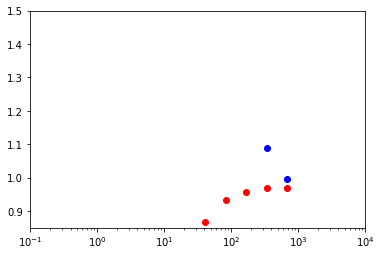

In [22]:
sequence_entropy = []
sequence_kldiv = []
d = 4
x_axis = []
y_axis = []
y2_axis = []

for curr_sequence in sequences:
    curr_prob, curr_alphabet = sa.calc_probs(curr_sequence, d_max)
    curr_cond_prob = sa.calc_cond_probs(curr_prob, curr_alphabet, d_max-1)
    sequence_entropy.append(sa.calc_cond_entropy(curr_prob, curr_cond_prob, d_max-1))
    sequence_kldiv.append(sa.calc_kldivergence(curr_prob, p, 10))
    y_axis.append(sequence_entropy[d-4][-1])
    y2_axis.append(sequence_kldiv[d-4])
    x_axis.append(len(dmark_machines[d-4].states))
    d = d + 1
    
plt.plot(x_axis, y_axis, 'ro')
plt.plot(x_axis, y2_axis, 'bo')
plt.xscale('log')
plt.axis([0.1,10000,0.85,1.5])
print('x='+str(x_axis))
print('y='+str(y2_axis))
plt.savefig('entropy_and_kl_graph.png')
plt.show()

### Kullback-Leibler divergence test

Test code for calculating the kullback leibler divergence

In [22]:
sa.calc_kldivergence(curr_prob, p, 9)

NameError: name 'curr_prob' is not defined

In [ ]:
#Generate sequences:
count = 0
for machine in dmark_machines:
    seq = machine.generate_sequence(N)
    with open(name + '/sequences/dmarkov_D' + str(drange[count]) + '_' + tag + '.yaml', 'w') as f:
        yaml.dump(seq, f)
    dmark_seqs.append(seq)
    count += 1

In [ ]:
#If the sequences have been previously generated, load them here:
if not dmark_seqs:
    for D in list(map(str,drange)):
        with open(name + '/sequences/dmarkov_D' + D + '_' + tag + '.yaml', 'w') as f:
            dmark_seqs.append(yaml.load(f))

In [ ]:
#Compute subsequence probabilities of occurrence of the D-Markov sequences
count = 0
p_dmark = []
for seq in dmark_seqs:
    p_dm, alphabet = sa.calc_probs(seq, d_max)
    p_dm.to_csv(name + '/results/probabilities/dmarkov_D'+ str(drange[count])  + '_' + tag + '.csv')
    p_dmark.append(p_dm)
    count += 1

In [ ]:
#If p_dmark has been previously computed, use this cell to load the values
if not p_dmark:
    for D in list(map(str,drange)):
        p_dm = pd.read_csv(name + '/results/probabilities/dmarkov_D' + D + '_' + tag + '.csv')
        p_dmark.append(p_dm)
    with open(name + '/alphabet.yaml', 'r') as f:
        alphabet = yaml.load(f)

In [ ]:
#Compute conditional probabilities of subsequences occurring after given each symbol of the alphabet
#One of the two previous cells needs to be executed first.
p_cond_dmark = []
count = 0
if p_dmark:
    for p_dm in p_dmark:
        p_cond_dm = sa.calc_cond_probs(p_dm, alphabet, d_max) 
        p_cond_dm.to_csv(name + '/results/probabilities/conditional/dmarkov_D' + str(drange[count]) + '_' + tag + '.csv')
        p_cond_dmark.append(p_cond_dm)
        count += 1
else:
    print("Run a cell that either computes or opens the probabilities.")

In [ ]:
#If p_cond has been previously computed, use this cell to load the values
if not p_cond_dmark:
    for D in list(map(str,drange)):
        p_cond_dmark.append(pd.read_csv(name + '/results/probabilities/conditional/dmarkov_D' + D + '_' + tag + '.csv'))

In [ ]:
#Compute conditional entropy
count = 0
h_dmark = []
if p_dmark and p_cond_dmark:
    for p_dm in p_dmark:
        h_dm = sa.calc_cond_entropy(p_dm, p_cond_dmark[count], d_max)
        h_dm.to_csv(name + '/results/cond_entropies/dmarkov_D' + str(drange[count]) + '_' + tag + '.csv')
        h_dmark.append(h_dm)
        count += 1
else:
    print("Run the conditional probabilities cell first.")

In [ ]:
#If h_dmark has been previously computed, use this cell to load the values
if not h_dmark:
    for D in list(map(str,drange)):
        h_dmark.append(pd.read_csv(name + '/results/cond_entropies/dmarkov_D' + D + '_' + tag + '.csv'))

In [ ]:
#Compute autocorrelation
aut_dmark = []
count = 0
for dseq in dmark_seqs:
    aut_dm = sa.calc_autocorr(dseq, a)
    aut_dm.to_csv(name + '/results/autocorrelations/dmarkov_D' + str(drange[count]) + '_'  + tag + '.csv')
    aut_dmark.append(aut_dm)
    count += 1

In [ ]:
#If aut has been previously computed, use this cell to load the values
if not aut_dmark:
    for D in list(map(str,drange)):
        aut_dmark.append(pd.read_csv(name + '/results/autocorrelations/dmarkov_D' + D + '_' + tag + '.csv'))

In [ ]:
#Compute the Kullback-Leibler Divergence between the sequences generated by the D-Markov Machines and the original
#sequence.
kld_dmark = []
for dseq in dmark_seqs:
    kld_dm = sa.calc_kld(dseq, X, d_max)
    kld_dmark.append(kld_dm)
    
kld_dmark.to_csv(name + '/results/kldivergences/dmarkov_' + tag + '.csv')

In [ ]:
#If the D-Markov Kullback-Leibler divergence has been previously computed, use this cell to load the values
if not kld_dmark:
    kld_dmark = pd.read_csv(name + '/results/kldivergences/dmarkov_' + tag + '.csv')

In [ ]:
#Compute the Probability Distances between the sequences generated by the D-Markov Machines and the original
#sequence.
pdist_dmark = []
for p_dm in p_dmark:
    pdist_dm = sa.calc_pdist(p_dm, p, d_max)
    pdist_dmark.append(pdist_dm)
    
pdist_dmark.to_csv(name + '/results/prob_distances/dmarkov_' + tag + '.csv')

In [ ]:
#If the Probability Distances of the D-Markov Machines have been previously computed, load them with this cell.
if not pdist_dmark:
    pdist_dmark = pd.read_csv(name + '/results/prob_distances/dmarkov_' + tag + '.csv')

## Clustering

Now that we have obtained the D-Markov Machines, the next step of DCGraM is to cluster the states of these machines. For a given D-Markov Machine *G*$_D$, its states $q$ are considered points in a $\Sigma$-dimensional space, in which each dimension is labeled with a symbol $\sigma$ from the alphabet and the position of the state $q$ in this dimension is its probability of transitioning with this symbol. These point-states are then clustered together in $K$ clusters using a variation of the K-Means clustering algorithm that instead of using an Euclidean distance between points, uses the Kullback-Leibler Divergence between the point-state and the cluster centroids.

In [ ]:
clustered = []
K = 4
for machine in dmark_machines:
    clustered.append(clustering.kmeans_kld(machine, K))

## Graph Minimization
Once that the states of the D-Markov Machines are clustered, these clusterings are then used as initial partitions of the D-Markov Machines' states. To these machines and initial partitions, a graph minimization algorithm (in the current version, only Moore) is applied in order to obtain a final reduced PFSA, the DCGraM PFSA.

In [ ]:
dcgram_machines = []
for ini_part in clustered:
    dcgram_machines.append(graphmin.moore(clustered))

## DCGraM Analysis
Now that the DCGraM machines have been generated, the same analysis done for the D-Markov Machines is used for them. Sequences are generated for each of the DCGraM machines and afterwards all of the analysis is applied to them so the comparison can be made between regular D-Markov and DCGraM.

In [ ]:
dcgram_seqs = []

In [ ]:
#Generate sequences:
count = 0
for machine in dcgram_machines:
    seq = machine.generate_sequence(N)
    with open(name + '/sequences/dcgram_D' + str(drange[count]) + '_' + tag + '.yaml', 'w') as f:
        yaml.dump(seq, f)
    dcgram_seqs.append(seq)
    count += 1

In [ ]:
#If the sequences have been previously generated, load them here:
if not dcgram_seqs:
    for D in list(map(str,drange)):
        with open(name + '/sequences/dcgram_D' + D + '_' + tag + '.yaml', 'w') as f:
            dcgram_seqs.append(yaml.load(f))

In [ ]:
#Compute subsequence probabilities of occurrence of the DCGraM sequences
count = 0
p_dcgram = []
for seq in dcgram_seqs:
    p_dc, alphabet = sa.calc_probs(seq, d_max)
    p_dc.to_csv(name + '/results/probabilities/dcgram_D'+ str(drange[count])  + '_' + tag + '.csv')
    p_dcgram.append(p_dc)
    count += 1

In [ ]:
#If p_dcgram has been previously computed, use this cell to load the values
if not p_dcgram:
    for D in list(map(str,drange)):
        p_dc = pd.read_csv(name + '/results/probabilities/dcgram_D' + D + '_' + tag + '.csv')
        p_dcgram.append(p_dm)
    with open(name + '/alphabet.yaml', 'r') as f:
        alphabet = yaml.load(f)

In [ ]:
#Compute conditional probabilities of subsequences occurring after given each symbol of the alphabet
#One of the two previous cells needs to be executed first.
p_cond_dcgram = []
count = 0
if p_dcgram:
    for p_dc in p_dcgram:
        p_cond_dc = sa.calc_cond_probs(p_dc, alphabet, d_max) 
        p_cond_dc.to_csv(name + '/results/probabilities/conditional/dcgram_D' + str(drange[count]) + '_' + tag + '.csv')
        p_cond_dcgram.append(p_cond_dc)
        count += 1
else:
    print("Run a cell that either computes or opens the probabilities.")

In [ ]:
#If p_cond_dcgram has been previously computed, use this cell to load the values
if not p_cond_dcgram:
    for D in list(map(str,drange)):
        p_cond_dcgram.append(pd.read_csv(name + '/results/probabilities/conditional/dcgram_D' + D + '_' + tag + '.csv'))

In [ ]:
#Compute conditional entropy
count = 0
h_dcgram = []
if p_dcgram and p_cond_dcgram:
    for p_dc in p_dcgram:
        h_dc = sa.calc_cond_entropy(p_dc, p_cond_dcgram[count], d_max)
        h_dc.to_csv(name + '/results/cond_entropies/dcgram_D' + str(drange[count]) + '_' + tag + '.csv')
        h_dcgram.append(h_dc)
        count += 1
else:
    print("Run the conditional probabilities cell first.")

In [ ]:
#If h_dcgram has been previously computed, use this cell to load the values
if not h_dcgram:
    for D in list(map(str,drange)):
        h_dcgram.append(pd.read_csv(name + '/results/cond_entropies/dcgram_D' + D + '_' + tag + '.csv'))

In [ ]:
#Compute autocorrelation
aut_dcgram = []
count = 0
for dcseq in dcgram_seqs:
    aut_dc = sa.calc_autocorr(dcseq, a)
    aut_dc.to_csv(name + '/results/autocorrelations/dcgram_D' + str(drange[count]) + '_'  + tag + '.csv')
    aut_dcgram.append(aut_dc)
    count += 1

In [ ]:
#If aut has been previously computed, use this cell to load the values
if not aut_dcgram:
    for D in list(map(str,drange)):
        aut_dmark.append(pd.read_csv(name + '/results/autocorrelations/dcgram_D' + D + '_' + tag + '.csv'))

In [ ]:
#Compute the Kullback-Leibler Divergence between the sequences generated by the DCGraM Machines and the original
#sequence.
kld_dcgram = []
for dcseq in dcgram_seqs:
    kld_dc = sa.calc_kld(dcseq, X, d_max)
    kld_dcgram.append(kld_dc)
    
kld_dcgram.to_csv(name + '/results/kldivergences/dcgram_' + tag + '.csv')

In [ ]:
#If the DCGraM Kullback-Leibler divergence has been previously computed, use this cell to load the values
if not kld_dcgram:
    kld_dcgram = pd.read_csv(name + '/results/kldivergences/dcgram_' + tag + '.csv')

In [ ]:
#Compute the Probability Distances between the sequences generated by the DCGraM Machines and the original
#sequence.
pdist_dcgram = []
for p_dc in p_dcgram:
    pdist_dc = sa.calc_pdist(p_dc, p, d_max)
    pdist_dcgram.append(pdist_dc)
    
pdist_dcgram.to_csv(name + '/results/prob_distances/dcgram_' + tag + '.csv')

In [ ]:
#If the Probability Distances of the DCGraM Machines have been previously computed, load them with this cell.
if not pdist_dcgram:
    pdist_dcgram = pd.read_csv(name + '/results/prob_distances/dcgram_' + tag + '.csv')

### Plots

Once all analysis have been made, the plots of each of those parameters is created to visualize the performance. The plots have the x-axis representing the number of states of each PFSA and the y-axis represents the parameters being observed. There are always two curves: one for the DCGraM machines and one for the D-Markov Machines. Each point in these curves represents a machine of that type for a certain value of $D$. The further right a point is in the curve, the higher its $D$-value. On the curve for conditional entropy there is also a black representing the original sequence's conditional entropy for the $L$ being used as a baseline.

In [ ]:
#initialization
import matplotlib.pyplot as plt

#Labels to be used in the plots' legends
labels = ['D-Markov Machines, D from ' + str(drange[0]) + ' to ' + str(d_max),
          'DCGraM Machines, D from ' + str(drange[0]) + ' to ' + str(d_max),
          'Original Sequence Baseline']

#Obtaining number of states of the machines to be used in the x-axis:
states_dmarkov = []
for dm in dmark_machines:
    states_dmarkov.append(dm.shape[0])
    
states_dcgram = []
for dc in dcgram_machines:
    states_dcgram.append(dc.shape[0])
    
states = [states_dmarkov, states_dcgram]

In [ ]:
#Conditional Entropy plots

H = 10

h_dmark_curve = []
for h_dm in h_dmarkov:
    h_dmark_curve.append(h_dm[H])
plt.semilogx(states[0], h_dmark_curve, marker='o', label=labels[0])
    
h_dcgram_curve = []
for h_dc in h_dcgram:
    h_dcgram_curve.append(h_dc[H])
plt.semilogx(states[1], h_dcgram_curve, marker='x', label=labels[1])
    

#Opening original sequence baseline:
h_base = h[H]
plt.axhline(y=h_base, color='k', linewidth = 3, label=labels[2])

plt.xlabel('Number of States', fontsize=16)
plt.yalbel('$h_' + str(H) + '$', fontsize=16)
plt.legend(loc='upper right', shadow=False, fontsize='large')
plt.title('Conditional Entropy',fontsize=18,weight='bold')
plt.savefig(name + '/plots/conditional_entropy_' + tag + '.eps' , bbox_inches='tight', format='eps',dpi=1000)
plt.show()

In [ ]:
#Kullback-Leibler plots

plt.semilogx(states[0], kld_dmark, marker='o', label=labels[0])
plt.semilogx(states[1], kld_dcgram, marker='x', label=labels[1])

plt.xlabel('Number of States', fontsize=16)
plt.yalbel('$k_' + str(H) + '$', fontsize=16)
plt.legend(loc='upper right', shadow=False, fontsize='large')
plt.title('Kullback-Leibler Divergence',fontsize=18,weight='bold')
plt.savefig(name + '/plots/kldivergence_' + tag + '.eps' , bbox_inches='tight', format='eps',dpi=1000)
plt.show()

In [ ]:
#Probability Distance plots

plt.semilogx(states[0], pdist_dmark, marker='o', label=labels[0])
plt.semilogx(states[1], pdist_dcgram, marker='x', label=labels[1])

plt.xlabel('Number of States', fontsize=16)
plt.yalbel('$P_' + str(H) + '$', fontsize=16)
plt.legend(loc='upper right', shadow=False, fontsize='large')
plt.title('Probability Distance',fontsize=18,weight='bold')
plt.savefig(name + '/plots/prob_distance_' + tag + '.eps' , bbox_inches='tight', format='eps',dpi=1000)
plt.show()

In [ ]:
#TODO: Think how to have good plots for autocorrelation